# Stability

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;*Most control engineers aren't as stable as their systems*

If you know epsilon-delta proofs, I'm sorry for your loss. There is an epsilon-delta definition of stability in the slides, have fun. For normal people stability means that a certain system trajectory stays bounded under bounded inputs. Even simpler: a stable system always returns to certain points. The stability of certain equilibria is easy to assess, since the linearisation is a good approximation locally at the equilibrium point, the stability of the linearised system indicates the stability of the equilibrium point too.

## Stability of linear systems

So assessing the stability of linear systems is important for all types of systems. Before, we already saw some notions of stability in the context of the characteristic polynomial of systems. There are two interesting relations there:
1. The characteristic polynomial is equivalent to det($sI-A$) for complex $s$.
2. The roots of the characteristic polynomial are equivalent to the eigenvalues of $A$.

That second point sounds familiar! We already saw stability related to the roots of the characteristic polynomial before. So, the eigenvalues of $A$, $\Lambda$, reveal the stability of the system. Surprisingly though, there are three types of stability, not two:
1. Unstable $\leftarrow \exists\mathfrak{R}(\lambda)>0, \lambda\in\Lambda$.
2. Neutrally stable $\leftarrow \mathfrak{R}(\lambda)\leq 0, \forall\lambda\in\Lambda$ with at most one eigenvalue at 0 or on conjugate pair with real part 0.
3. Assymptotically stable $\leftarrow \mathfrak{R}(\lambda)\leq 0, \forall\lambda\in\Lambda$.

These things are nicely visualised for two dimensional system, so you can guess it: have look at the code block!

Eigenvalues are:
[-0.25+2.2220486j -0.25-2.2220486j]
Eigenvectors are:
[[ 0.91287093+0.j          0.91287093-0.j        ]
 [-0.04564355+0.40568871j -0.04564355-0.40568871j]]


<IPython.core.display.Javascript object>

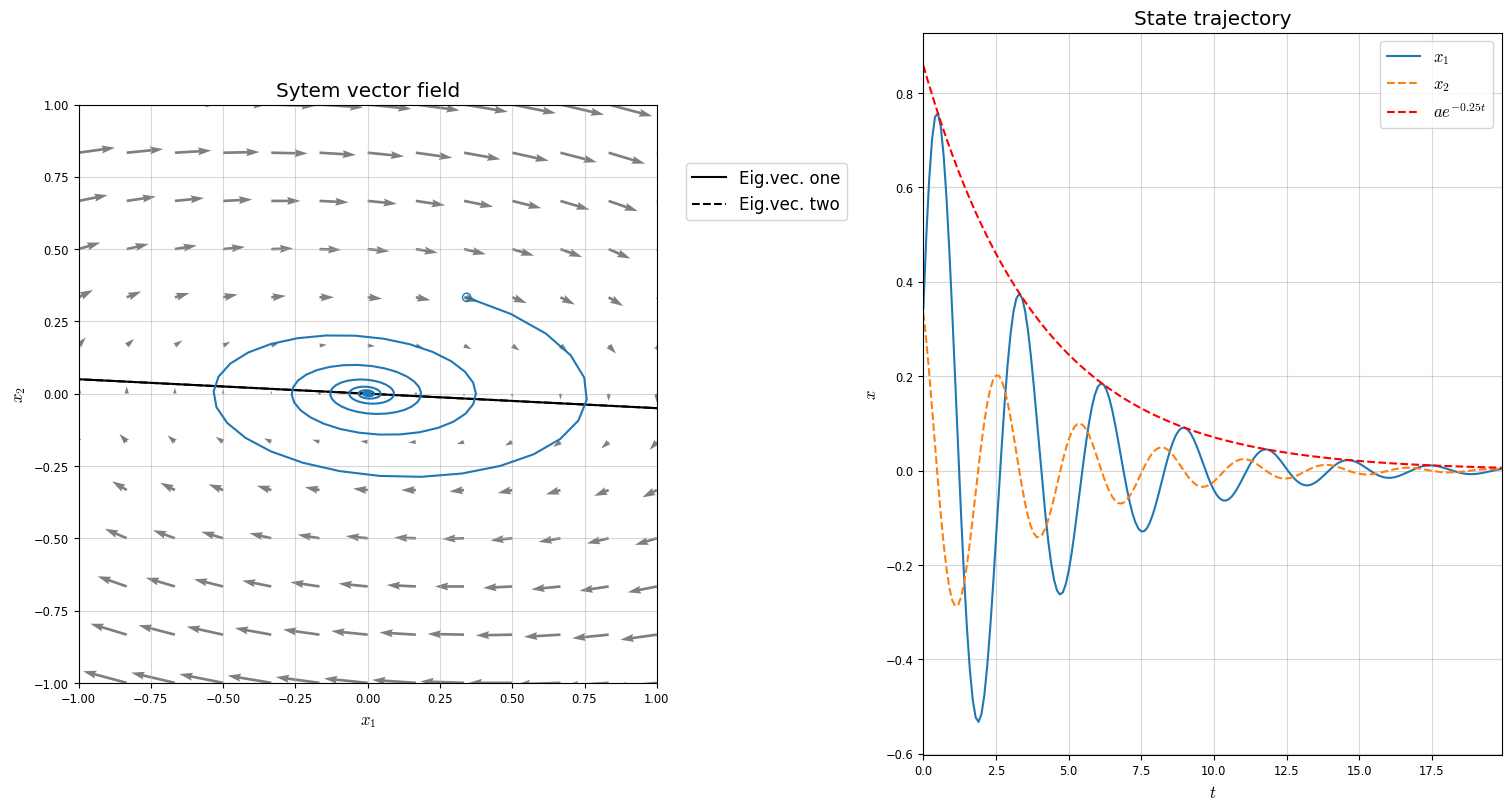

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

import warnings
warnings.filterwarnings("ignore")

import scipy.signal as signal
import numpy.random as rng
import numpy.linalg as lin
import control as cm
from helperFunctions import *
setPlotStyle()

if True: # Toggle between defining A or eigenvalues
    # Define A
    A = np.array([[0, 5],
                [-1, -.5]])
    # A = np.array([[0, 5],[-1, -.5]]) is interesting
else:
    if 'A' in locals(): del A
    if 'v1' in locals(): del v1, v2

    # Define eigenvalues
    lambda1 = -.3
    lambda2 = -.1

    ## Optionally, you can also define the eigenvectors, otherwise they're random and perpendicular
    v1 = np.array([[2],[1]])
    v2 = np.array([[4],[-1]])

###### Processing and Plotting #########
if 'A' not in locals():
    if 'v1' not in locals():
        v1 = rng.randn(2, 1)
        v2 = np.array([[0,-1],[1, 0]])@v1

    T = np.append(v1, v2, axis=1)
    A = T@np.diag([lambda1, lambda2])@lin.inv(T)
    print(f"A is {A}")
else:
    e, v = lin.eig(A)
    print(f"Eigenvalues are:"), print(e)
    print(f"Eigenvectors are:"), print(v)
    v1 = v[:,0][:,np.newaxis]
    v2 = v[:,1][:,np.newaxis]
    lambda1 = e[0]
    lambda2 = e[1]

fig, ax = plt.subplots(1,2)
ax[0].set(aspect="equal", title="Sytem vector field")
vector_field(A=A, v1=v1, v2=v2, ax=ax[0], n=13)

## Create trajectory
traj = np.full([2, 200], np.nan)
traj[:,[0]] = rng.rand(2,1)
h = 0.1
for idx in range(max(traj.shape)-1):
    traj[:, idx+1] = RK4(x=traj[:, idx], dx=lambda x: A@x, h=h)
ax[0].plot(traj[0,:], traj[1,:])
ax[0].scatter(traj[0,0], traj[1,0], marker='o', color='tab:blue', facecolors='none')

T = np.arange(max(traj.shape))*h
l1, = ax[1].plot(T, traj[0,:], label="$x_1$")
l2, = ax[1].plot(T, traj[1,:], '--', label="$x_2$")

if np.iscomplex(lambda1):
    peakIdx, _ = signal.find_peaks(traj[0,:])
    l3, = ax[1].plot(T, traj[0,peakIdx[0]]*np.exp((T-T[peakIdx[0]])*np.real(lambda1)), 'r--', label=f"$a e^{"{"}{np.real(lambda1)}t{"}"}$")
    ax[1].legend(handles=[l1,l2,l3])
else:
    ax[1].legend(handles=[l1,l2])

ax[1].set(xlim=[0, max(T)], title="State trajectory", xlabel="$t$", ylabel="$x$")
display(fig)


# How to be an eigenvalue wizard

Ever had *one of those people* look at a matrix and fully describe its behaviour in a second. Then you check and they're right and you have to take a moment to contemplate if that imposter syndrome might not be as fake as you hoped? Yeah...

Anyways here are some tricks:
1. A diagonal matrix has its eigenvalues on the diagonal.
2. A triangular matrix also has its eigenvalues on the diagonal.
3. Block diagonal matrices are the union of the eigenvalues of the blocks.
4. Have a look at the [Jordan normal form](https://en.wikipedia.org/wiki/Jordan_normal_form) if you want, it's also triangular.
5. The sum of all eigenvalues is the trace of the matrix.
6. The product of all eigenvalues is the determinant of the matrix.
7. If $\lambda_k$ are the eigenvalues of $A$, then the eigenvalues of $A^{-1}$ are $1/\lambda_k$.
